In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('G:/Stuff/py-master/ML/13_kmeans/income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


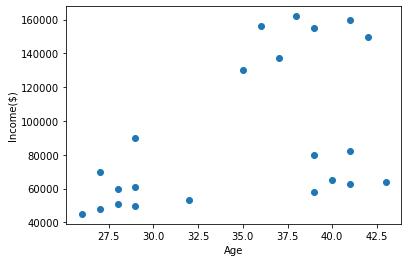

In [4]:
plt.scatter(df.iloc[:,1],df.iloc[:,2])
plt.xlabel('Age')
plt.ylabel('Income($)');

In [5]:
x =df[['Age','Income($)']]
x.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [31]:
km =KMeans(n_clusters=3)

In [32]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
km.labels_

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [33]:
predict_lables=km.predict(x)
predict_lables

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [10]:
df['cluster']=predict_lables
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [34]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

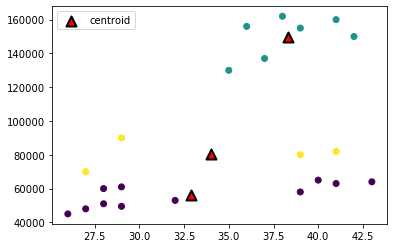

In [35]:
plt.scatter(df.iloc[:,1],df.iloc[:,2],c=predict_lables)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',c='r',linewidths=2,edgecolors='k',label='centroid',s=100)
plt.legend()

### Using Preprocessing Min Max scaler method

In [13]:
scaler =MinMaxScaler()
sdata=scaler.fit_transform(x)

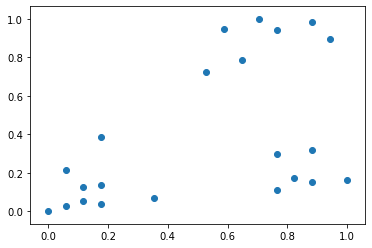

In [14]:
plt.scatter(sdata[:,0],sdata[:,1])

In [15]:
kmeans =KMeans(n_clusters=3)

In [16]:
kmeans.fit(sdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
predict_lables_2=kmeans.predict(sdata)
predict_lables_2

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [18]:
kmeans.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

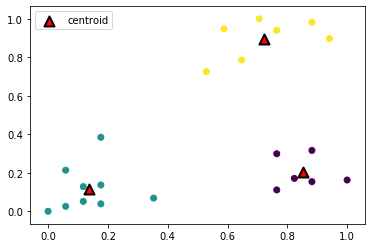

In [19]:
plt.scatter(sdata[:,0],sdata[:,1],c=predict_lables_2)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',c='r',linewidths=2,edgecolors='k',label='centroid',s=100)
plt.legend()

### Elbow plot

In [36]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(sdata)
    sse.append(km.inertia_)

In [37]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.21055478995472493,
 0.17681044133887713,
 0.13781880133764027,
 0.10188787724979426]

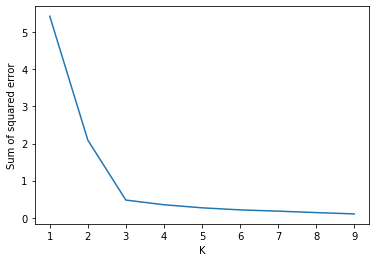

In [38]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)